In [411]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [406]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


## Do your thing crazy machine learning thing here :) ...

In [412]:
###### PRE_PROCESSING #######
temp = tX.copy()
tX_norm = np.zeros(tX.shape)
temp[temp == -999] = 0
mean_features = np.mean(temp, axis=0)
std_features = np.std(temp, axis=0)
for i, f in enumerate(tX.T):
    f[f == -999] = mean_features[i]
    #tX_norm[:, i] = f
    tX_norm[:, i] = (f - mean_features[i]) / std_features[i]

tXt_norm = np.c_[np.ones(len(y)), tX_norm]
#tXt_norm = np.c_[np.ones(len(y)) / len(y), tX_norm]

In [431]:
# from stochastic_gradient_descent import *
# Define the parameters of the algorithm.
gammas = np.logspace(-4, 0, 30)
losses = []

for gamma in gammas:
    max_iters = 75
    #gamma = 2*10**(-1)
    batch_size = 1

    # Initialization
    w_initial = np.random.rand(tXt_norm.shape[1])

    # Start SGD.
    start_time = datetime.datetime.now()
    sgd_losses, sgd_ws = gradient_descent(
        y, tXt_norm, w_initial, max_iters, gamma)
    end_time = datetime.datetime.now()
    losses.append(sgd_losses[len(sgd_losses) - 1])

    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("\nSGD: execution time={t:.3f} seconds, gamma = {gamma}\n".format(t=exection_time, gamma=gamma))
    
print(gammas[np.argmin(losses)])

Gradient Descent(74/74): loss=20.858317793272736
SGD: execution time=2.689 seconds, gamma = 0.0001

Gradient Descent(74/74): loss=16.234468903890463
SGD: execution time=2.458 seconds, gamma = 0.00013738237958832623

Gradient Descent(74/74): loss=15.404822315107575
SGD: execution time=2.492 seconds, gamma = 0.00018873918221350977

Gradient Descent(74/74): loss=13.532759867318156
SGD: execution time=3.256 seconds, gamma = 0.0002592943797404667

Gradient Descent(74/74): loss=12.081955925823014
SGD: execution time=2.472 seconds, gamma = 0.0003562247890262444

Gradient Descent(74/74): loss=7.9748328916891299
SGD: execution time=2.455 seconds, gamma = 0.0004893900918477494

Gradient Descent(74/74): loss=8.0962940514033787
SGD: execution time=2.593 seconds, gamma = 0.0006723357536499335

Gradient Descent(74/74): loss=5.6586304278341356
SGD: execution time=2.592 seconds, gamma = 0.0009236708571873865

Gradient Descent(74/74): loss=5.5592422544178595
SGD: execution time=2.537 seconds, gamma = 0

In [432]:
max_iters = 75
gamma = 2*10**(-1)
batch_size = 1

# Initialization
w_initial = np.random.rand(tXt_norm.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = gradient_descent(
    y, tXt_norm, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
losses.append(sgd_losses[len(sgd_losses) - 1])

# Print result
exection_time = (end_time - start_time).total_seconds()
print("\nSGD: execution time={t:.3f} seconds, gamma = {gamma}\n".format(t=exection_time, gamma=gamma))

Gradient Descent(74/74): loss=0.34225022956605644
SGD: execution time=3.086 seconds, gamma = 0.2



In [433]:
w_initial

array([0.78831912, 0.22213403, 0.34805589, 0.28822728, 0.94841107,
       0.65690107, 0.28598242, 0.69899104, 0.9247574 , 0.96614318,
       0.04776264, 0.75240224, 0.67852607, 0.63335213, 0.6538142 ,
       0.08255559, 0.90744994, 0.58047609, 0.12528789, 0.04889966,
       0.98583582, 0.65355492, 0.636003  , 0.26956306, 0.4033466 ,
       0.8787786 , 0.10022949, 0.9242482 , 0.37566443, 0.17540399,
       0.59563593])

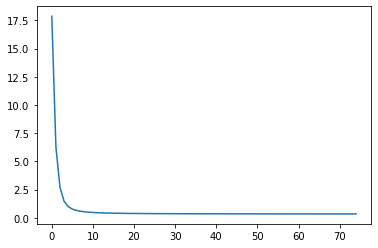

In [434]:
plt.plot(np.arange(max_iters), sgd_losses)

## Generate predictions and save ouput in csv format for submission:

In [335]:
DATA_TEST_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, tXt_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [435]:
###### PRE_PROCESSING #######
temp_test = tX_test.copy()
tX_norm_test = np.zeros(tX_test.shape)
temp_test[temp_test == -999] = 0
mean_features_test = np.mean(temp_test, axis=0)
std_features_test = np.std(temp_test, axis=0)
for i, f in enumerate(tX_test.T):
    f[f == -999] = mean_features_test[i]
    tX_norm_test[:, i] = (f - mean_features_test[i]) / std_features_test[i]
    
tXt_norm_test = np.c_[np.ones(len(y_test)), tX_norm_test]

In [436]:
sgd_ws

array([-3.14663941e-01,  5.72695862e-03, -2.25932780e-01, -2.35782663e-01,
        1.23240169e-01,  1.08900312e-01,  6.39849704e-02,  2.82250055e-02,
        2.78228100e-01, -2.02671327e-02, -4.42249031e-01, -1.00766204e-01,
        1.22203077e-01,  6.32378262e-02,  3.04359872e-01, -1.30962504e-03,
       -1.05564546e-03,  2.64907457e-01,  1.80830120e-04,  2.69452840e-03,
        5.61459185e-02,  1.09122160e-03, -3.36754276e-02, -1.60713038e-02,
        4.88634200e-03,  4.17451411e-04,  1.52785819e-04,  5.26140636e-02,
        1.78507073e-03, -1.49047402e-03,  1.68129311e-01])

In [437]:
pred_train = predict_labels(sgd_ws, tXt_norm)
len(pred_train[abs(pred_train-y) == 0]) * 100 / len(y)

74.3468

In [438]:
pred_test = predict_labels(sgd_ws, tXt_norm_test)
len(pred_test[abs(pred_test-y_test) == 0]) * 100 / len(y_test)

23.90530024391188

In [196]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined